In [5]:
import pandas as pd
import numpy as np
import warnings
from pathlib import Path
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("../data/raw/heart_disease.csv", sep=",")
df.head(10)

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
5,25.0,Male,152.0,257.0,Low,Yes,No,No,28.144681,No,...,No,Low,Medium,5.504876,Low,126.0,91.0,4.297575,10.815983,No
6,78.0,Female,121.0,175.0,High,Yes,Yes,Yes,18.042332,No,...,No,Medium,Medium,9.240911,Medium,107.0,85.0,11.582983,19.659461,No
7,38.0,Female,161.0,187.0,Low,Yes,Yes,Yes,34.736683,No,...,No,Low,Medium,7.841008,High,228.0,111.0,4.929381,17.146599,No
8,56.0,Female,135.0,291.0,Low,No,Yes,Yes,34.493112,Yes,...,Yes,High,Low,6.941403,High,317.0,103.0,5.119015,6.051129,No
9,75.0,Male,144.0,252.0,Low,Yes,Yes,No,30.142149,No,...,Yes,Low,Medium,4.002662,High,199.0,96.0,10.005698,7.604357,No


In [7]:
print("\nStatistiques descriptives:")
df.describe()


Statistiques descriptives:


,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


<br>
<br>
<hr>

#### __*- Analyse Exploratoire*__

<br>

__*- Vérification des valeurs manquantes*__

In [8]:
compte_manquant = df.isnull().sum()
pct_manquant = (compte_manquant / len(df) * 100).round(2)


resume_manquants = pd.DataFrame({
    "Valeur manquante": compte_manquant,
    "Pourcentage (%)": pct_manquant
})

resume_manquants = resume_manquants.sort_values("Pourcentage (%)", ascending=False)
resume_manquants.head(30)

,Valeur manquante,Pourcentage (%)
Alcohol Consumption,2586,25.86
Diabetes,30,0.30
Sugar Consumption,30,0.30
Cholesterol Level,30,0.30
Age,29,0.29
Triglyceride Level,26,0.26
CRP Level,26,0.26
High LDL Cholesterol,26,0.26
High Blood Pressure,26,0.26
Low HDL Cholesterol,25,0.25



<br>

__*- Vérification des doublons*__

In [9]:
doublons = df.duplicated().sum()
print(f"Nombre de doublons : {doublons}")

# Supprimer les doublons si présents
if doublons > 0:
    df = df.drop_duplicates()
    print(f"Après suppression : {df.shape}")

Nombre de doublons : 0


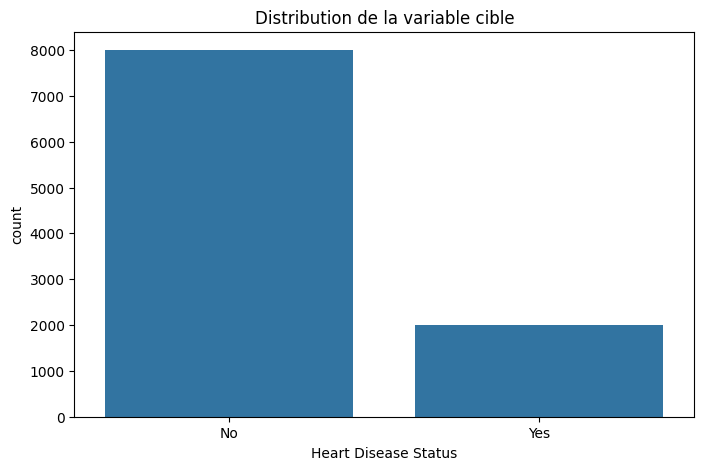

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Heart Disease Status')
plt.title('Distribution de la variable cible')
plt.show()

In [11]:
# Vérifie le déséquilibre des colonnes catégorielles.
def verifier_desequilibre(df, seuil=0.2):
    cols_cat = df.select_dtypes(include=['object']).columns.tolist()
    resultats = []

    for col in cols_cat:
        counts = df[col].value_counts()
        ratio_min = counts.min() / counts.sum()
        resultats.append({
            'colonne': col,
            'nb_classes': len(counts),
            'classe_majoritaire': counts.idxmax(),
            'classe_minoritaire': counts.idxmin(),
            'ratio_minoritaire': f"{ratio_min:.2%}"
        })
    return pd.DataFrame(resultats)



verifier_desequilibre(df)

,colonne,nb_classes,classe_majoritaire,classe_minoritaire,ratio_minoritaire
0,Gender,2,Male,Female,49.87%
1,Exercise Habits,3,High,Low,32.79%
2,Smoking,2,Yes,No,48.64%
3,Family Heart Disease,2,No,Yes,49.85%
4,Diabetes,2,No,Yes,49.67%
5,High Blood Pressure,2,Yes,No,49.65%
6,Low HDL Cholesterol,2,Yes,No,49.87%
7,High LDL Cholesterol,2,No,Yes,49.51%
8,Alcohol Consumption,3,Medium,High,32.72%
9,Stress Level,3,Medium,High,32.78%


<br>
<br>
<hr>

#### __*- Séparer target et features*__

In [12]:
X = df.drop('Heart Disease Status', axis=1)
y = df['Heart Disease Status']

#### __*- Encodage de target*__

In [13]:
from sklearn.preprocessing import LabelEncoder


# Encoder la variable cible
le_target = LabelEncoder()
y = le_target.fit_transform(y)


print("\nClasses après encodage de la cible:")
for i, class_label in enumerate(le_target.classes_):
    print(f"{i} : {class_label}")


Classes après encodage de la cible:
0 : No
1 : Yes



#### __*- Identifier les colonnes catégorielles*__

In [14]:
cols_categorielles = X.select_dtypes(include='object').columns.tolist()
cols_numeriques = X.select_dtypes(include=[np.number]).columns.tolist()


print(f"Colonnes numériques ({len(cols_numeriques)}): {cols_numeriques}")
print(f"Colonnes catégorielles ({len(cols_categorielles)}): {cols_categorielles}")

Colonnes numériques (9): ['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours', 'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level']
Colonnes catégorielles (11): ['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level', 'Sugar Consumption']


<br>
<br>
<hr>

#### __*- SPLIT TRAIN / TEST*__





In [15]:
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\nTrain : {len(X_train)} échantillons")
print(f"Test : {len(X_test)} échantillons")


Train : 8000 échantillons
Test : 2000 échantillons


<br>
<br>
<hr>

#### __*- PREPROCESSING SUR TRAIN*__

<br>

__*- Imputer les valeurs manquantes sur les variables numériques et catégorielles*__

In [16]:
from sklearn.impute import SimpleImputer



def impute_missing_values(X_train, X_test, num_cols, cat_cols, num_strategy='median', cat_strategy='most_frequent'):
    """
    Impute les valeurs manquantes pour les variables numériques ET catégorielles

    Parameters:
        X_train (DataFrame): Features d'entraînement
        X_test (DataFrame): Features de test
        num_cols (list): Colonnes numériques
        cat_cols (list): Colonnes catégorielles
        num_strategy (str): Stratégie pour numériques ('median', 'mean')
        cat_strategy (str): Stratégie pour catégorielles ('most_frequent', 'constant')

    Returns:
        tuple: (X_train_imputed, X_test_imputed, num_imputer, cat_imputer)
    """

    X_train = X_train.copy()
    X_test = X_test.copy()

    # Imputation numérique
    num_imputer = SimpleImputer(strategy=num_strategy)
    num_imputer.fit(X_train[num_cols])
    X_train[num_cols] = num_imputer.transform(X_train[num_cols])
    X_test[num_cols] = num_imputer.transform(X_test[num_cols])

    # Imputation catégorielle
    cat_imputer = SimpleImputer(strategy=cat_strategy, fill_value='Unknown')
    cat_imputer.fit(X_train[cat_cols])
    X_train[cat_cols] = cat_imputer.transform(X_train[cat_cols])
    X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

    return X_train, X_test, num_imputer, cat_imputer



X_train_imputed, X_test_imputed, num_imputer, cat_imputer = impute_missing_values(
    X_train, X_test, cols_numeriques, cols_categorielles
)

X_train_imputed.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
7395,19.0,Male,175.0,272.0,High,No,Yes,No,28.879776,Yes,Yes,No,Low,Low,9.336435,High,201.0,159.0,5.826202,17.965483
5642,22.0,Female,123.0,170.0,High,No,No,No,30.256079,No,Yes,Yes,Medium,High,6.997215,Low,335.0,122.0,3.209347,7.662533
8866,45.0,Female,158.0,172.0,Medium,Yes,Yes,Yes,33.965395,Yes,No,Yes,Medium,Medium,8.946560,Low,377.0,109.0,13.295242,19.739923
8517,29.0,Male,143.0,292.0,Low,Yes,No,Yes,21.565885,No,Yes,No,High,High,9.851365,Medium,370.0,120.0,0.691456,12.739675
3706,46.0,Female,135.0,224.0,Low,No,Yes,No,28.271290,No,No,Yes,High,High,7.965155,High,351.0,149.0,10.908451,18.198180


<br>

__*- Encoder les variables catégorielles*__

In [17]:
from sklearn.preprocessing import LabelEncoder


def encoder_variables_categorielles(X_train, X_test, cols_categorielles):
    """
    Encode les variables catégorielles using LabelEncoder

    Parameters:
        X_train (DataFrame): Training features
        X_test (DataFrame): Test features  
        cols_categorielles (list): List of categorical column names

    Returns:
        tuple: (X_train_encoded, X_test_encoded, label_encoders)
    """

    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()
    label_encoders = {}

    for col in cols_categorielles:
        label_encoders[col] = LabelEncoder()
        # Retirer .astype(str) car les données sont déjà imputées
        X_train_encoded[col] = label_encoders[col].fit_transform(X_train[col])
        X_test_encoded[col] = label_encoders[col].transform(X_test[col])

    return X_train_encoded, X_test_encoded, label_encoders


# Utiliser X_train_imputed et X_test_imputed (données imputées)
X_train_encoded, X_test_encoded, label_encoders = encoder_variables_categorielles(
    X_train_imputed, X_test_imputed, cols_categorielles
)

X_train_encoded.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
7395,19.0,1,175.0,272.0,0,0,1,0,28.879776,1,1,0,1,1,9.336435,0,201.0,159.0,5.826202,17.965483
5642,22.0,0,123.0,170.0,0,0,0,0,30.256079,0,1,1,2,0,6.997215,1,335.0,122.0,3.209347,7.662533
8866,45.0,0,158.0,172.0,2,1,1,1,33.965395,1,0,1,2,2,8.946560,1,377.0,109.0,13.295242,19.739923
8517,29.0,1,143.0,292.0,1,1,0,1,21.565885,0,1,0,0,0,9.851365,2,370.0,120.0,0.691456,12.739675
3706,46.0,0,135.0,224.0,1,0,1,0,28.271290,0,0,1,0,0,7.965155,0,351.0,149.0,10.908451,18.198180


<br>

__*- Normalisation des variables numériques*__

In [18]:
from sklearn.preprocessing import StandardScaler



def scale_numeriques(X_train, X_test, num_cols):
    """
      Scale les variables numériques avec StandardScaler
    """

    scaler = StandardScaler()

    scaler.fit(X_train[num_cols])
    
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    
    X_train_scaled[num_cols] = scaler.transform(X_train[num_cols])
    X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])
    
    return X_train_scaled, X_test_scaled, scaler



X_train_scaled, X_test_scaled, scaler = scale_numeriques(
    X_train_encoded, X_test_encoded, cols_numeriques
)


X_train_scaled.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
7395,-1.662369,1,1.436939,1.065133,0,0,1,0,-0.044442,1,1,0,1,1,1.341143,0,-0.576313,1.643199,-0.380708,1.280252
5642,-1.497511,0,-1.515229,-1.279291,0,0,0,0,0.173925,0,1,1,2,0,0.003459,1,0.961279,0.074968,-0.985413,-1.099029
8866,-0.233597,0,0.471808,-1.233322,2,1,1,1,0.762451,1,0,1,2,2,1.118193,1,1.443210,-0.476032,1.345242,1.690027
8517,-1.112841,1,-0.379779,1.524824,1,1,0,1,-1.204877,0,1,0,0,0,1.635606,2,1.362888,-0.009801,-1.567248,0.073446
3706,-0.178645,0,-0.833959,-0.038126,1,0,1,0,-0.140986,0,0,1,0,0,0.556976,0,1.144872,1.219353,0.793701,1.333990


<br>
<br>
<hr>

#### __*- Equilibrage*__

<br>

__*- Equilibrage le train avec SMOTE*__

In [20]:
from collections import Counter
from imblearn.over_sampling import SMOTENC, SMOTE




def equilibrage_concis(X_train, y_train, cat_cols=None, seuil=0.40, random_state=42):
    """
    Retourne X_train équilibré (DataFrame) et y_train (ndarray) si ratio minoritaire < seuil.
    Utilise SMOTENC si cat_cols présent, sinon SMOTE.
    """
    cnt = Counter(y_train)
    ratio_min = min(cnt.values()) / sum(cnt.values())
    print(f"Ratio classe minoritaire: {ratio_min:.2%}")
    if ratio_min >= seuil:
        print("Pas d'équilibrage nécessaire.")
        return X_train.copy(), np.array(y_train)

    cat_idx = [X_train.columns.get_loc(c) for c in (cat_cols or []) if c in X_train.columns]
    sampler = SMOTENC(categorical_features=cat_idx, random_state=random_state) if cat_idx else SMOTE(random_state=random_state)
    Xr, yr = sampler.fit_resample(X_train.values, np.array(y_train))
    Xr = pd.DataFrame(Xr, columns=X_train.columns)
    print(f"Après rééchantillonnage — Classe 0: {sum(yr==0)}, Classe 1: {sum(yr==1)}")
    return Xr, yr


X_train_balanced, y_train_balanced = equilibrage_concis(X_train_scaled, y_train, cat_cols=cols_categorielles)


Ratio classe minoritaire: 20.00%
Après rééchantillonnage — Classe 0: 6400, Classe 1: 6400


<br>
<br>
<hr>

#### __*- ENTRAÎNEMENT*__

<br>

__*- Créer les modèles avec PIPELINE*__

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report





model_log = LogisticRegression(max_iter=500)
model_log.fit(X_train_balanced, y_train_balanced)


y_pred_LogisticRec = model_log.predict(X_test_scaled)
y_proba_LogisticRec = model_log.predict_proba(X_test_scaled)[:, 1]

print(f"Accuracy: {accuracy_score(y_test, y_pred_LogisticRec):.2%}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_LogisticRec):.2%}")
print(f"\nClassification Report:\n{classification_report(y_test, y_pred_LogisticRec)}")

Accuracy: 49.95%
ROC-AUC: 45.94%

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.52      0.62      1600
           1       0.18      0.41      0.25       400

    accuracy                           0.50      2000
   macro avg       0.48      0.47      0.44      2000
weighted avg       0.66      0.50      0.55      2000



In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint


parametres = {
    "n_estimators": randint(100, 400),
    "max_depth": randint(5, 20),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 10),
    "max_features": ["sqrt", "log2"],
    "bootstrap": [True, False]
}


cv_stratifiee = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

recherche = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=parametres,
    n_iter=30,
    cv=cv_stratifiee,
    verbose=1,
    n_jobs=-1,
    random_state=42,
    scoring='roc_auc'
)



recherche.fit(X_train_balanced, y_train_balanced)
print(f"\nMeilleurs paramètres: {recherche.best_params_}")


model_rf = recherche.best_estimator_

y_pred_rf = model_rf.predict(X_test_scaled)
y_proba_rf = model_rf.predict_proba(X_test_scaled)[:, 1]

print(f"\nAccuracy RF: {accuracy_score(y_test, y_pred_rf):.2%}")
print(f"ROC-AUC RF: {roc_auc_score(y_test, y_proba_rf):.2%}")
print(f"\n{classification_report(y_test, y_pred_rf)}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits

Meilleurs paramètres: {'bootstrap': True, 'max_depth': 19, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 259}

Accuracy RF: 63.10%
ROC-AUC RF: 47.32%

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1600
           1       0.19      0.27      0.23       400

    accuracy                           0.63      2000
   macro avg       0.50      0.50      0.49      2000
weighted avg       0.68      0.63      0.65      2000



In [23]:
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


def cross_val_mean(model, X, y, cv=5, scoring='f1'):
    """
    Calcule le score moyen de validation croisée pour un modèle

        - Parameters:
            model: Modèle sklearn à évaluer
            X: Features
            y: Target
            cv: Nombre de folds
            scoring: Métrique d'évaluation

            Returns:
        f      loat: Score moyen de la validation croisée
    """

    scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
    return scores.mean()





# Pipelines avec SMOTE intégré pour cross-validation
pipeline_log = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(max_iter=500))
])

pipeline_rf = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', model_rf)
])

In [24]:
mean_f1_log = cross_val_mean(pipeline_log, X_train_scaled, y_train, cv=5, scoring='f1')
mean_f1_rf = cross_val_mean(pipeline_rf, X_train_scaled, y_train, cv=5, scoring='f1')

print(f"\nF1-score moyen Logistic Regression: {mean_f1_log:.2%}")
print(f"F1-score moyen Random Forest: {mean_f1_rf:.2%}")


F1-score moyen Logistic Regression: 25.03%
F1-score moyen Random Forest: 17.32%


In [25]:
def meilleur_modele(models_dict, X, y, cv=5, scoring='f1'):
    """
    Trouve le meilleur modèle basé sur le score de validation croisée
    """
    meilleur_score = 0
    meilleur_modele = None
    meilleur_nom = ""

    for nom, model in models_dict.items():
        score = cross_val_mean(model, X, y, cv=cv, scoring=scoring)
        print(f"{nom}: {score:.2%}")

        if score > meilleur_score:
            meilleur_score = score
            meilleur_modele = model
            meilleur_nom = nom

    print(f"\n🎯 Meilleur modèle: {meilleur_nom} avec un score de {meilleur_score:.2%}")
    return meilleur_modele, meilleur_nom, meilleur_score




models = {
    'Logistic Regression': model_log,
    'Random Forest': model_rf
}

meilleur_model, nom_meilleur, score_meilleur = meilleur_modele(
    models, X_train_balanced, y_train_balanced, cv=5, scoring='f1'
)

Logistic Regression: 55.92%
Random Forest: 76.61%

🎯 Meilleur modèle: Random Forest avec un score de 76.61%


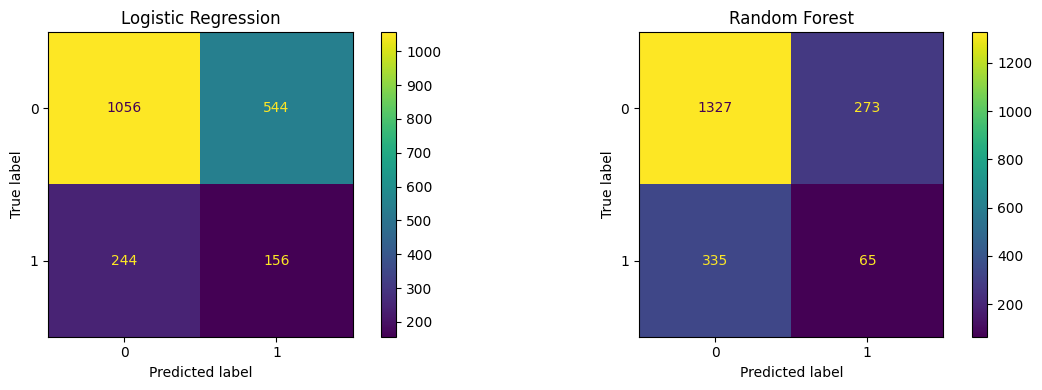

In [ ]:

from sklearn.metrics import ConfusionMatrixDisplay



fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Logistic Regression
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_LogisticRec, ax=axes[0])
axes[0].set_title('Logistic Regression')

# Random Forest
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, ax=axes[1])
axes[1].set_title('Random Forest')

plt.tight_layout()
plt.show()

<br>


__*- Sauvegarder le meilleur modèle*__

In [26]:
import joblib

# Sauvegarder le meilleur modèle
joblib.dump(meilleur_model, '../notebooks/best_models/best_model.pkl')

['../notebooks/best_models/best_model.pkl']

<br>
<br>
<hr>

#### __*- Démonstration des Prédictions par le meilleur modèle*__

In [58]:
import joblib

model = joblib.load('../models/best_models/best_model.pkl')

# Réinitialiser les index
X_test_reset = X_test_scaled.reset_index(drop=True)
y_test_reset = np.array(y_test)

np.random.seed(42)
indices = np.random.choice(len(X_test_reset), 5, replace=False)

print("=" * 50)
print("🏥 DÉMONSTRATION - 5 patients")
print("=" * 50)

for i, idx in enumerate(indices):
    patient = X_test_reset.iloc[[idx]]
    pred = model.predict(patient)[0]
    proba = model.predict_proba(patient)[0][1]
    vrai = y_test_reset[idx]
    
    print(f"\nPatient {i+1}:")
    print(f"  {'🔴 Maladie' if pred == 1 else '🟢 Sain'} (Proba: {proba:.1%})")
    print(f"  Réalité: {'Maladie' if vrai == 1 else 'Sain'}")
    print(f"  {'✅' if pred == vrai else '❌'}")

🏥 DÉMONSTRATION - 5 patients

Patient 1:
  🔴 Maladie (Proba: 53.3%)
  Réalité: Sain
  ❌

Patient 2:
  🟢 Sain (Proba: 30.1%)
  Réalité: Maladie
  ❌

Patient 3:
  🟢 Sain (Proba: 19.7%)
  Réalité: Sain
  ✅

Patient 4:
  🟢 Sain (Proba: 45.7%)
  Réalité: Sain
  ✅

Patient 5:
  🟢 Sain (Proba: 21.1%)
  Réalité: Sain
  ✅
